<a href="https://colab.research.google.com/github/KrisSandy/ExMachineLearning/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Introduction

Logistic regression is a machine learning technique used for binary classification problems. In this technique
the probability of the response is calculated for a given set of features using sigmoid function. Sigmoid function can be mathematically represented as below

$sigmoid(z) = \frac{1}{1+e^{-z}}$

Logistic regression uses the sigmoid function to calculate the probalities for a give set of input parameters and classifies the outcome based on the threshold value.

#### Hypothesis

Let us consider that our training set consists of m examples and n features. The training set can be represented as 
$\{(x^{(1)}, y^{(1)}),(x^{(2)}, y^{(2)}),...,(x^{(m)}, y^{(m)})\}$ where $y\in \{0, 1\}$

$x^{(i)}$ is the input features of the training example and $y^{(i)}$ is the class for the $i^{th}$ example. 
If the features for a training example are represented as $x_1, x_2, ... , x_n$ and parameters for each feature are represented by $\theta_0, \theta_1, ... \theta_n$, then the linear model can be computed as below

$z = \theta_0 x_0+ \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$
where $x_0 = 1$

Assuming $\theta$ as parameter vector and X is the feature vector, the above equation can be written as 

$z = \theta^TX$

if $g$ is the sigmod function, the hypothesis for logistic regression is defined as 

$h(\theta) = g(z) = \frac{1}{1+e^{-\theta^TX}}$



#### Decision Boundaries
Sigmoid function returns a value ranging between 0 and 1 as shown in *Figure 1*. For binary classification problems, a threshold is set to classify the outcome. In general this threshold is set to 0.5 and the outcome is predicted as below

$y =
  \begin{cases}
    1       & \quad \text{if } h(\theta) \geq 0.5 \text{ i.e. } \theta^TX \geq 0\\
    0  & \quad \text{if } h(\theta) < 0.5 \text{ i.e. } \theta^TX < 0
  \end{cases}
$

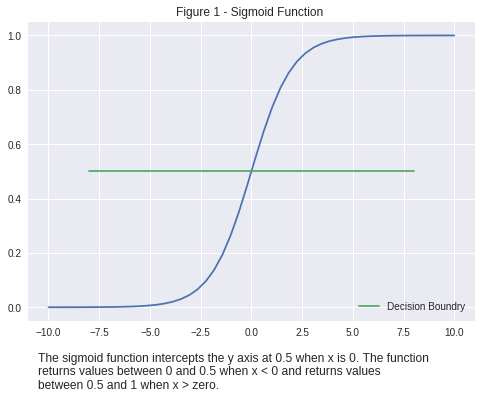

In [0]:
sigmoid_plot();

#### Cost Function

Cost function give a measure of how error-prone a model is. Cost functions for the logistic regression can be calculated as


$Cost(h_{\theta}(x), y) =   
 \begin{cases}
  -\log(h_{\theta}(x)) & \quad \text{ if } y = 1 \\ -\log(1-h_{\theta}(x)) & \quad \text { if } y = 0
  \end{cases}
$

Adding the cost functions of both the classes together and optimizing it we get the cost function for the classifier as below

$J(\theta) = - \dfrac{1}{m} [\sum_{i=1}^{m} y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1-h_\theta(x^{(i)}))]$

Vectorized representation of cost function can be written as 

$J(\theta) = - \dfrac{1}{m} [y^{T} \log(h) + (1 - y^{T}) \log(1-h)]$

where $h = \theta^TX$


#### Gradient Descent

The aim of training a classifier is to find the optimum values for $\theta$ vector and in turn increasing the accuracy of the predictor. We use Gradient descent for logistic regression to find the optimum values of $\theta$ by minimizing the cost function.

Algorithm for Gradient descent is as follows:

$\text{repeat until convergence \{} \\
\theta_j := \theta_j - \alpha \frac{1}{m} \displaystyle\sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \\ 
\text{\}}$

Vectorized implementation of the gradient descent is as follows:

$\theta := \theta - \frac{\alpha}{m}X^T(h-y) $

#### Regularization

In order to avoid overfitting (high variance) of training data, we do regularization by penalising the input parameters. This is done by adding extra terms in the cost function and gradient descent as below

Cost Function after regularization:

$J(\theta) = -\frac{1}{m}\displaystyle\sum_{i=1}^{m}[y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)})(\log(1-h_\theta(x^{(i)})))] + \frac{\lambda}{2m}\displaystyle\sum_{j=1}^{m}\theta_j^2$

Gradient Descent after regularization:

$\text{repeat until convergence \{} \\
\theta_j := \theta_j - \frac{\alpha}{m}[ \displaystyle\sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} + \lambda\theta_j] \\ 
\text{\}}$

## Multiclass Classification

Logistic regression can be extended to predict multiple class by using one vs all method

#### One vs All

In one vs all method, we calibrate the weights ($\theta$) of the model by considering one class at a time and making the output of this class to a 1 and rest of the classes to 0. This process is repeated for all the classes and the calibrated weights are determined for each class. When the classifier has to make a prediction, scores are calculated for each class using corresponding weights and the class with maxium score is returned.

## Implementation

#### Programming Language

I have used python as the programming language for implementing this classifier, as python has powerful libraries for vector and matrix operations using **numpy** package, simple and yet powerful interface for handling data structures and performaning data operations using **pandas** and optimisation packages in **scipy**. I have used these three packages for this assignment.

#### Design and Architecture

I have created a python class 'LogisticRegression' for implementing all the core functionalities of the classifier. Tuning parameters such as learning rate ($\lambda$) can be set when creating an object to this class. This class is generic capable of classifying both binary classification and multiclass classification with any number of input parameters. The classifier accepts CSV files as input and assumes that last column in the file is dependent variable.

Three simple methods are exposed by the class to train, predict and score the classifier 
1. **fit**: Fit method will take the training data (X and y) and trains the classifier. For training the classifier, theta vector has been initialised to zeroes. Static methods has been written for calculating sigmoid, cost and gradient using the vectorized versions of the formulas. Optimised theta is derived using the Optimise function of scipy by using cost function and gradient methods.Once the optimised theta is found, our model is trained.
2. **predict**: Predict method predicts the output using the trained classifier.
3. **score**: Score method accepts test data (X and y) and returns the accuracy of the classifier using the test data by calling predict method using X and comparing y predicted and actual.

All the methods are designed to accept the input data in either numpy arrays or pandas dataframe. Validations are donw to check the integrity of the input data.


Along with the classifier functionalities, I have also implemented generic functions like split test and train data. 

#### Model Construction

Input data is read from the csv file and stored in a pandas dataframe. The predictor variable ('type' of owl) if converted to numeric format by mapping LongEaredOwl to 0, SnowyOwl to 1 and BarnOwl to 2. After splitting the data into training and test set, the model is trained using the training set. During this process the model calculates the optimum $\theta$ values for each class using cost function and gradient descent (code is available in Appendix)

After the model is trained, we can use predict method to make the predictions.







#### Accuracies

The process of splitting the traning and test data, fitting the model is performed 10 times and the accuracies are calculated. Accuracy of the model is varying because of the test train split and different observations are used to train the model everytime. The mean accuracy for this 10 iterations can be used as an indicator to measure the accuracy of the model 

In [0]:

accuracy_10_itr()

Model accuracy for iteration 1 is 0.9111111111111111
Model accuracy for iteration 2 is 0.9333333333333333
Model accuracy for iteration 3 is 0.9555555555555556
Model accuracy for iteration 4 is 0.9333333333333333
Model accuracy for iteration 5 is 0.9111111111111111
Model accuracy for iteration 6 is 0.9777777777777777
Model accuracy for iteration 7 is 0.8888888888888888
Model accuracy for iteration 8 is 0.9111111111111111
Model accuracy for iteration 9 is 0.9555555555555556
Model accuracy for iteration 10 is 0.9333333333333333
Mean Accuracy : 0.9311111111111112







#### Test predictions

Predictions made for a set of test examples is shown below

In [0]:
print(emit_predictions())

       Predicted        Actual   Result
0   LongEaredOwl  LongEaredOwl  Correct
1   LongEaredOwl  LongEaredOwl  Correct
2   LongEaredOwl  LongEaredOwl  Correct
3   LongEaredOwl  LongEaredOwl  Correct
4   LongEaredOwl  LongEaredOwl  Correct
5   LongEaredOwl  LongEaredOwl  Correct
6   LongEaredOwl  LongEaredOwl  Correct
7   LongEaredOwl  LongEaredOwl  Correct
8   LongEaredOwl  LongEaredOwl  Correct
9   LongEaredOwl  LongEaredOwl  Correct
10  LongEaredOwl  LongEaredOwl  Correct
11  LongEaredOwl  LongEaredOwl  Correct
12  LongEaredOwl  LongEaredOwl  Correct
13  LongEaredOwl  LongEaredOwl  Correct
14  LongEaredOwl  LongEaredOwl  Correct
15      SnowyOwl      SnowyOwl  Correct
16      SnowyOwl      SnowyOwl  Correct
17      SnowyOwl      SnowyOwl  Correct
18      SnowyOwl      SnowyOwl  Correct
19      SnowyOwl      SnowyOwl  Correct
20      SnowyOwl      SnowyOwl  Correct
21      SnowyOwl      SnowyOwl  Correct
22      SnowyOwl      SnowyOwl  Correct
23      SnowyOwl      SnowyOwl  Correct


#### Sample prediction

Prediction for sample feature values is shown below

In [0]:
#@title Enter below values to make a prediction of owl
body_length = 3.5  #@param {type: "number"}
wing_length = 5.8  #@param {type: "number"}
body_width = 1.6  #@param {type: "number"}
wing_width = 0.5  #@param {type: "number"}

sample_predict = model.predict(np.array([body_length, wing_length, body_width, wing_width]))
print(list(mapping.keys())[list(mapping.values()).index(sample_predict[0])])

LongEaredOwl







#### Learning Curve

Learning curves are plotted between the accuracy of the prediction with respect to sample size. This gives an indication of how the model accuracy is varying with respect to the size of the training set. It can be used to decide whether collecting more data improves the performance of the classifier.

Below learning curve is for a random split of training and test set. The curve indictes that the model has learned and the accuracies are consistent from size 30, however, learning curve is not a good indicator in this case as the model accuracies are highly dependent on the test and training split.

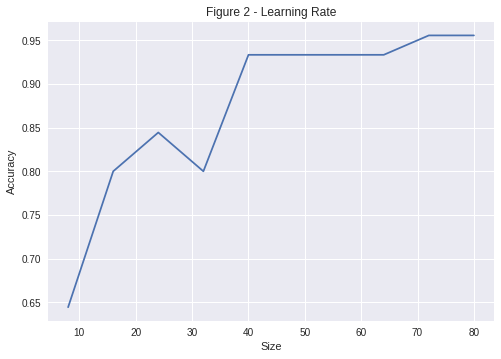

In [0]:

draw_learning_curve();

####Interface

I have created an interface for uploading the file, and downloading the result in Google colab. The link for the same is below.

**Click on the below link to access the interface for this model**

[Go to model Interface](https://colab.research.google.com/drive/12Q3txclGiMDMo9--VkKC_xs_oPkcxOPV)

## Conclusions and Observations

Logistic regression is a powerful tool for building classification models and can be easily extended to predict multi-class. Model tuning can be done by changing the learning rate and threshold setting according to the use case which in this case set to default (i.e. 0.5). For the given dataset, logistic regression performed well with mean accuracy of 93%. This may not be consistent as the dataset is small and model training completely depends on the test train split which can be avoided by collecting more data.





## Appendix (Code)

In [0]:

from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt



'''
Class to implement Logistic Regression
'''
class LogisticRegression:

    __theta = np.zeros(1)
    __classes = None

    def __init__(self, learning_rate, multi_class=False, threshold=0.5):
        self.__lambda = learning_rate
        self.__multi_class = multi_class
        self.__threshold = threshold

    '''
    Validate the type of input data. Accepted types are pd.Series, pd.Dataframe
    np.ndarray
    '''
    @staticmethod
    def __validate(d):
        if not (isinstance(d, pd.Series) or isinstance(d, pd.DataFrame) or isinstance(d, np.ndarray)):
            raise Exception("Invalid input. Only numpy array and pandas dataframes/series is allowed")

    '''
    Convert pd.Series or pd.Dataframe to numpy array
    '''
    @staticmethod
    def __convert2matrix(X):
        if isinstance(X, pd.Series) or isinstance(X, pd.DataFrame):
            X = X.values
        return X

    '''
    Calculate sigmoid
    '''
    @staticmethod
    def __sigmoid(z):
        return 1/(1+np.exp(-z))

    '''
    Output the prediction based on threshold
    '''
    def __sign_fn(self, y):
        f = lambda x: 0 if x < self.__threshold else 1
        return np.array([f(x) for x in y])

    '''
    Returns the class of the prediction
    '''
    def __class_fm(self, y):
        f = lambda x: self.__classes[x]
        return np.array([f(x) for x in y])

    '''
    Implementation of the cost function (including regularization)
    Returns the calculated cost
    '''
    def __cost(self, theta, X, y):
        h = self.__sigmoid(X.dot(theta))
        m = len(y)
        return (-1/m) * (y.T.dot(np.log(h)) + 
                         (1-y).T.dot(np.log(1-h))) + 
                        ((self.__lambda/2*m)*np.sum(theta**2))

    '''
    Implementation of the gradient function (including regularization)
    Returns the gradient
    '''
    def __gradient_jac(self, theta, X, y):
        m=len(y)
        h = self.__sigmoid(X.dot(theta))
        return (1/m) * X.T.dot(h - y) + ((self.__lambda/m)*theta)

    '''
    Minimise the cost (finding optimum theta) using cost and gradient
    '''
    def __minimize_cost(self, theta, X, y):
        optim = optimize.minimize(self.__cost, theta, jac=self.__gradient_jac, 
                                  args=(X, y), method='CG')
        return optim.x

    '''
    Predict method to make predictions for both binary and multiclass. Uses the 
    optimised theta to calculate the probability and assigns the class with 
    highest probability.
    '''
    def predict(self, X):
        self.__validate(X)
        X = self.__convert2matrix(X)
        if X.ndim == 1:
            X = X.reshape(1, X.shape[0])
        X = np.insert(X, 0, 1, axis=1)
        if self.__multi_class:
            y_predict = self.__sigmoid(X.dot(self.__theta.T))
            y_predict = np.argmax(y_predict, axis=1)
            return self.__class_fm(y_predict)
        else:
            y_predict = self.__sigmoid(X.dot(self.__theta))
            return self.__sign_fn(y_predict)


    '''
    Trains the classifier for both binary and multiclass cases. calls __minimize_cost 
    function to find the optimum theta values for the given training data 
    '''
    def fit(self, X, y):
        self.__validate(X)
        self.__validate(y)
        X = self.__convert2matrix(X)
        y = self.__convert2matrix(y)
        X = np.insert(X, 0, 1, axis=1)
        if self.__multi_class:
            self.__classes = np.unique(y)
            self.__theta = np.zeros((len(self.__classes), X.shape[1]))
            for index, _class in enumerate(self.__classes):
                y_class = np.array(list(map(lambda x: 1 if x == _class else 0, y)))
                self.__theta[index] = self.__minimize_cost(self.__theta[index], X, y_class)
        else:
            self.__theta = np.zeros(X.shape[1])
            self.__theta = self.__minimize_cost(self.__theta, X, y)


    '''
    Predicts the output using the features provided. Accuracy is then calculated 
    using the predicted 
    values and actual values.
    '''
    def score(self, X, y):
        self.__validate(X)
        self.__validate(y)
        y = self.__convert2matrix(y)
        y_predict = self.predict(X)
        tot = len(y)
        correct = 0
        for i in range(tot):
            if y[i] == y_predict[i]:
                correct += 1
        return correct/tot



In [0]:
'''
Splits the test and train data randomly according to the fraction provided
random_state parameter can be used to control the randomness of the split
and results in same split if same random_state value is passes
'''


def test_train_split(X, y, frac=0.25, random_state=None):
    if random_state is None:
        X_train = X.sample(frac=1 - frac)
    else:
        X_train = X.sample(frac=1-frac, random_state=random_state)
    return X_train, X.drop(X_train.index), y.iloc[X_train.index], y.drop(X_train.index)


'''
The method takes in the complete dataframe read and converts the last column as 
to numerical values starting from 0. The method assumes that last column is 
predictor variable. It also returns a mapping variable which is a dictionary of 
mapping the class name with the number assigned
'''
def prepare_data(data):
    y_col = data.shape[1]-1
    data.columns = list(range(y_col+1))
    mapping = dict()
    for index, p_class in enumerate(set(data[y_col].values)):
        mapping[p_class] = index
    data[y_col] = data[y_col].map(mapping)
    X = data.drop(columns=[y_col])
    y = data[y_col]
    return X, y, mapping


In [0]:
data = pd.read_csv(filename)
X, y, mapping = prepare_data(data)

# creating dictionary of class names and corresponding numbers
map_original = dict(zip(mapping.values(), mapping.keys()))

# Identify if its a multi class prediction
multi_class = True if len(mapping) > 2 else False

# Split the data and train the model
X_train, X_test, y_train, y_test = test_train_split(X, y, frac=(1/3))
model = LogisticRegression(learning_rate=0.0001, multi_class=multi_class)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [0]:
'''
This method splits the training data in to chunks of 10 and trains the model by 
adding one chunk to existing training data starting with first chunk.
Accuracy is recorded for every iteration and is plotted
'''

def draw_learning_curve(X, y, multi_class):
    X_train, X_test, y_train, y_test = test_train_split(X, y, frac=(1/3))
    increment_size = int(len(X_train)/10)
    lrm_model = LogisticRegression(learning_rate=0.0001, multi_class=multi_class)
    learning_curve = {'accuracy': [], 'size': []}
    for i in range(10):
        m = (i+1)*increment_size
        lrm_model.fit(X_train.head(m), y_train.head(m))
        learning_curve['size'].append(m)
        learning_curve['accuracy'].append(lrm_model.score(X_test, y_test))
    plt.plot(learning_curve['size'], learning_curve['accuracy'])
    plt.xlabel('Size')
    plt.ylabel('Accuracy')
    plt.title('Figure 2 - Learning Rate')
    return plt

In [0]:
'''
This method splits the data into training and test set, trains the model with the 
training set and records the accuracy using the test set. This process is done 
10 times using random split and the accuracies will be printed and recorded.
Mean accuracy of the 10 iterations will be printed as well
'''
def accuracy_10_itr(X, y, multi_class):
    accuracies = np.empty(10)
    for i in range(10):
        X_train, X_test, y_train, y_test = test_train_split(X, y, frac=(1/3))
        lrm_model = LogisticRegression(learning_rate=0.0001, multi_class=multi_class)
        lrm_model.fit(X_train, y_train)
        accuracies[i] = lrm_model.score(X_test, y_test)
        print('Model accuracy for iteration {} is {}'.format(i+1, accuracies[i]))

    print("Mean Accuracy : {}".format(accuracies.mean()))

In [0]:
'''
This method converts the class numbers of predicted and actual y values.
Check if the prediction is correct and updates the result column
Writes the dataframe into csv file which will be stored in the same folder as the script
'''
def emit_predictions(y_predict, y_test, map_original):
    predictions = list()
    for i in range(len(y_predict)):
        predictions.append([y_predict[i], y_test.values[i],
                            'Correct' if y_predict[i] == y_test.values[i] else 'Wrong'])
    df_result = pd.DataFrame(predictions, 
                             columns=["Predicted", "Actual", "Result"])
    df_result["Predicted"] = df_result["Predicted"].map(map_original)
    df_result["Actual"] = df_result["Actual"].map(map_original)
    df_result.to_csv('predictions.csv', header=True, index=False)
    return df_result



In [0]:
def sigmoid_plot():

    x = np.linspace(-10,10)
    y = 1 / (1 + np.exp(-x))
    plt.figure(1)
    plt.plot(x, y)
    plt.plot([8, -8], [0.5, 0.5], label="Decision Boundry")
    plt.legend(loc="lower right")
    plt.title("Figure 1 - Sigmoid Function ")
    plt.text(-10.5,-.3,"The sigmoid function intercepts the y axis at 0.5 when x is 0. The function \nreturns values between 0 and 0.5 when x < 0 and returns values \nbetween 0.5 and 1 when x > zero.")
    return plt